In [57]:
import PIL.Image
from io import BytesIO
import IPython.display

def show_image(a):
    a = np.uint8(np.clip(a, 0., 255.))
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, 'png')
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

import numpy as np

def screen_space_dither(frag_coord):
    dither = np.dot(np.array([171.0, 231.0]), frag_coord)
    dither, _ = np.modf(dither / 98.0)
    return dither - 0.5

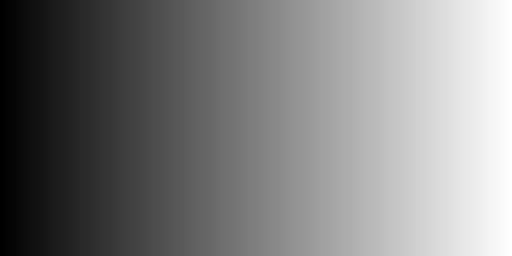

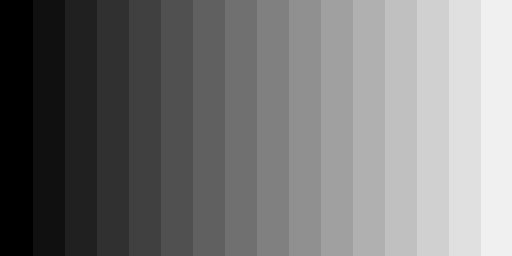

(256, 512) (256, 512)


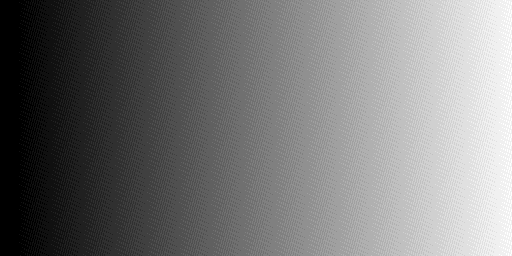

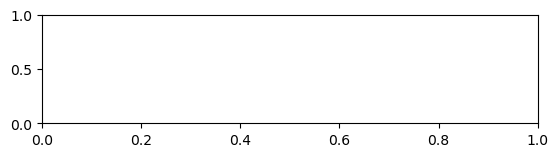

In [56]:
# Import necessary libraries
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np

# generate a 256x128 grayscale image of a linear gradient
gradient = np.linspace(0, 255, 512, dtype=np.uint8)
image = np.tile(gradient, (256, 1))

# plot the original image
show_image(image)

# plot the image quantized to 4-bit precision
quantized_image_4bit = (image // 16) * 16
show_image(quantized_image_4bit)

# add dither and quantize the image again
#dither_matrix = np.random.rand(image.shape[0], image.shape[1]) * 16 - 8
dither_matrix = np.zeros(image.shape)
print(dither_matrix.shape, image.shape)
for y in range(image.shape[1]):
    for x in range(image.shape[0]):
        dither_matrix[x, y] = screen_space_dither(np.array([float(x), float(y)]))

dithered_image = image + dither_matrix * 16.0
quantized_dithered_image = (dithered_image // 16) * 16

plt.subplot(313)
show_image(quantized_dithered_image)

# Show the plot
#plt.tight_layout()
plt.show()
